### 주혜인 주제분석1주차 패키지과제

In [1]:
import numpy as np
import pandas as pd

### 1.1 데이터 불러오기

In [2]:
data = pd.read_csv("C:/Users/JU HYE IN/Desktop/피셋/패키지과제/주제분석 1주차/data.csv")

### 1.2 데이터 확인

In [3]:
# dimension 확인
print(data.shape)

(1216553, 13)


총 1216553개의 row와 13개의 column이 있습니다.

In [4]:
data.head(5)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [6]:
data.isnull().sum() # 결측값은 없습니다.

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

### 1.3 불필요한 행 삭제

In [7]:
data = data[data.city=="서울특별시"]
data=data.reset_index(drop=True)

### 1.4 변수 이름 바꾸기

In [8]:
data.rename(columns={'transaction_real_price' : 'price'}, inplace=True)

### 1.5 불필요한 변수 삭제
총 4개의 변수와 부산광역시에 해당하는 행을 삭제해 742285개의 행과 9개의 열이 남았습니다.

In [9]:
data.drop(['transaction_id','apartment_id','jibun','city'],axis=1, inplace=True)
print(data.shape)

(742285, 9)


### 1.6 연/월 뽑기

In [10]:
data['transaction_month']= data.transaction_year_month%100 #뒤의 두 자리를 추출하기 위해 100으로 나눈 나머지를 이용하였습니다.
data['transaction_year']=data.transaction_year_month//100 #앞의 네 자리를 추출하기 위해 100으로 나눈 몫을 이용하였습니다.
data.head(5) #확인해볼까요? month와 year 컬럼이 만들어졌습니다.

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_month,transaction_year
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,1,2008
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1,2008
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1,2008
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,1,2008
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,1,2008


### 1.7 필요한 연도 뽑기

In [11]:
data=data[data.transaction_year>=2012] # 년도가 2012이상인 열만 남기고,
data=data.reset_index(drop=True) #인덱스를 재정렬했습니다.

## 2.데이터 시각화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 거래가격 분포 확인
    해석: 이상치의 범위가 굉장히 넓다는 특징이 있습니다. boxplot을 통해 알 수 있는 중앙값에 비하여 훨씬 높은 가격대에 이상치들이 존재함을 알 수 있습니다.

Text(0.5, 0, 'Price')

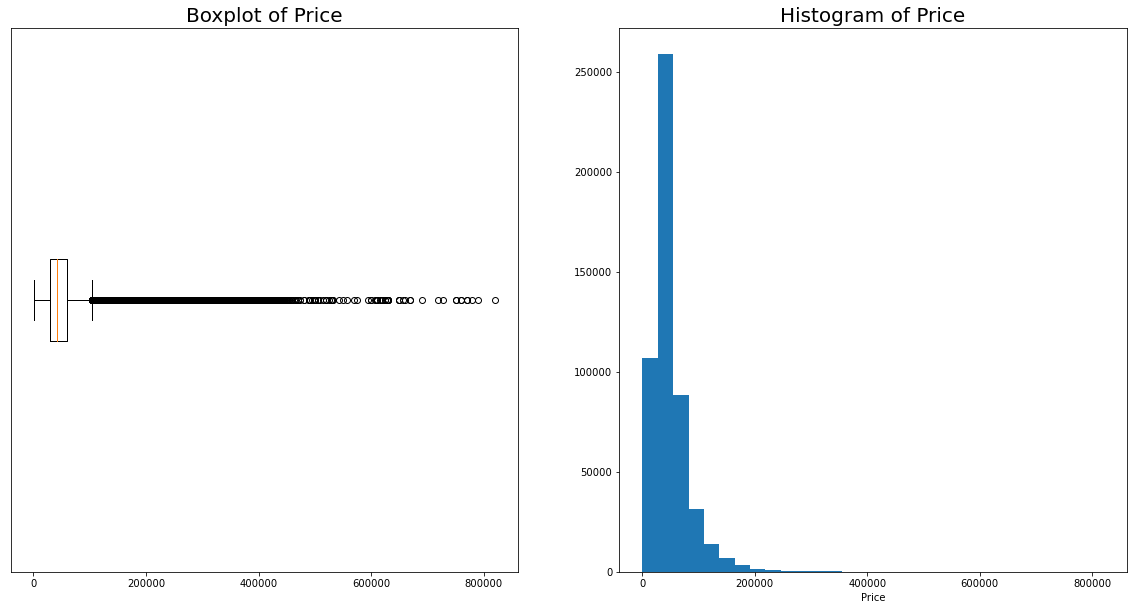

In [13]:
firstplot = plt.figure(figsize=(20,10)) # (20, 10)  사이즈의 firstplot이란 plot을 생성할거임
axes1 = firstplot.add_subplot(1, 2, 1) # 플랏을 분할할건데, 1행 2열로 분할할거고, 이건 그중 첫번째 플랏임
axes2 = firstplot.add_subplot(1, 2, 2) # 이건 그중에 두번째 플랏임
plt.style.use('default')

axes1.boxplot(data.price, vert=False)
plt.xlabel('Price', fontsize=10)
axes1.set_title('Boxplot of Price', fontsize=20)# 플랏 제목도 달고, 폰트 사이즈도 지정줄거임
axes1.yaxis.set_visible(False)


axes2.hist(data.price, bins=30)
axes2.set_title('Histogram of Price', fontsize=20)
plt.xlabel('Price', fontsize=10)

C:\Users\JU HYE IN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Price')

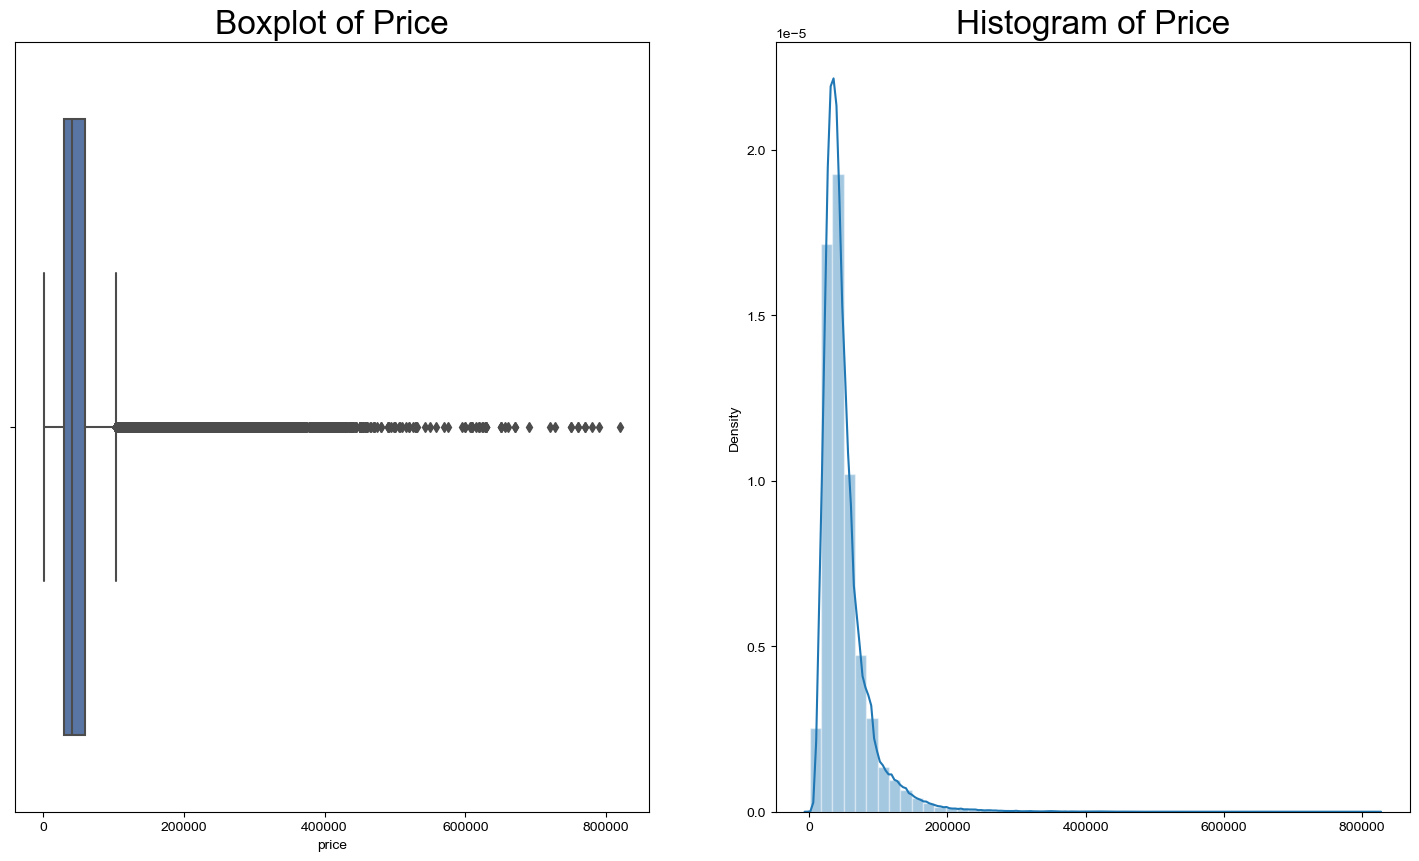

In [14]:
fig,axs=plt.subplots(1,2, figsize=(18,10))
sns.set(font_scale=2)

sns.boxplot(ax=axs[0],x='price', data=data)
axs[0].set_title('Boxplot of Price')

sns.distplot(ax=axs[1],x=data['price'])
axs[1].set_title('Histogram of Price')

### 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인
    * 왼쪽에는 거래연도별 거래 횟수의 분포를, 오른쪽에는 거래연도별 거래 가격의 분포를 그려주세요.
    * 더불어서 제목, y축 label을 쓰세요
    * plot을 해석해주세요
    
    해석: 거래 연도별 가격의 분포는 거래연도가 최근일수록 높아짐을 알 수 있습니다. 거래 연도별 거래 횟수의 분포를 살펴보면 2015년까지 증가하다 그 이후에는 감소하는 추세입니다. 가격이 상승함에 따라 거래량이 조금 줄어든게 아닐까? 라는 생각이듭니다.

Text(0, 0.5, 'price')

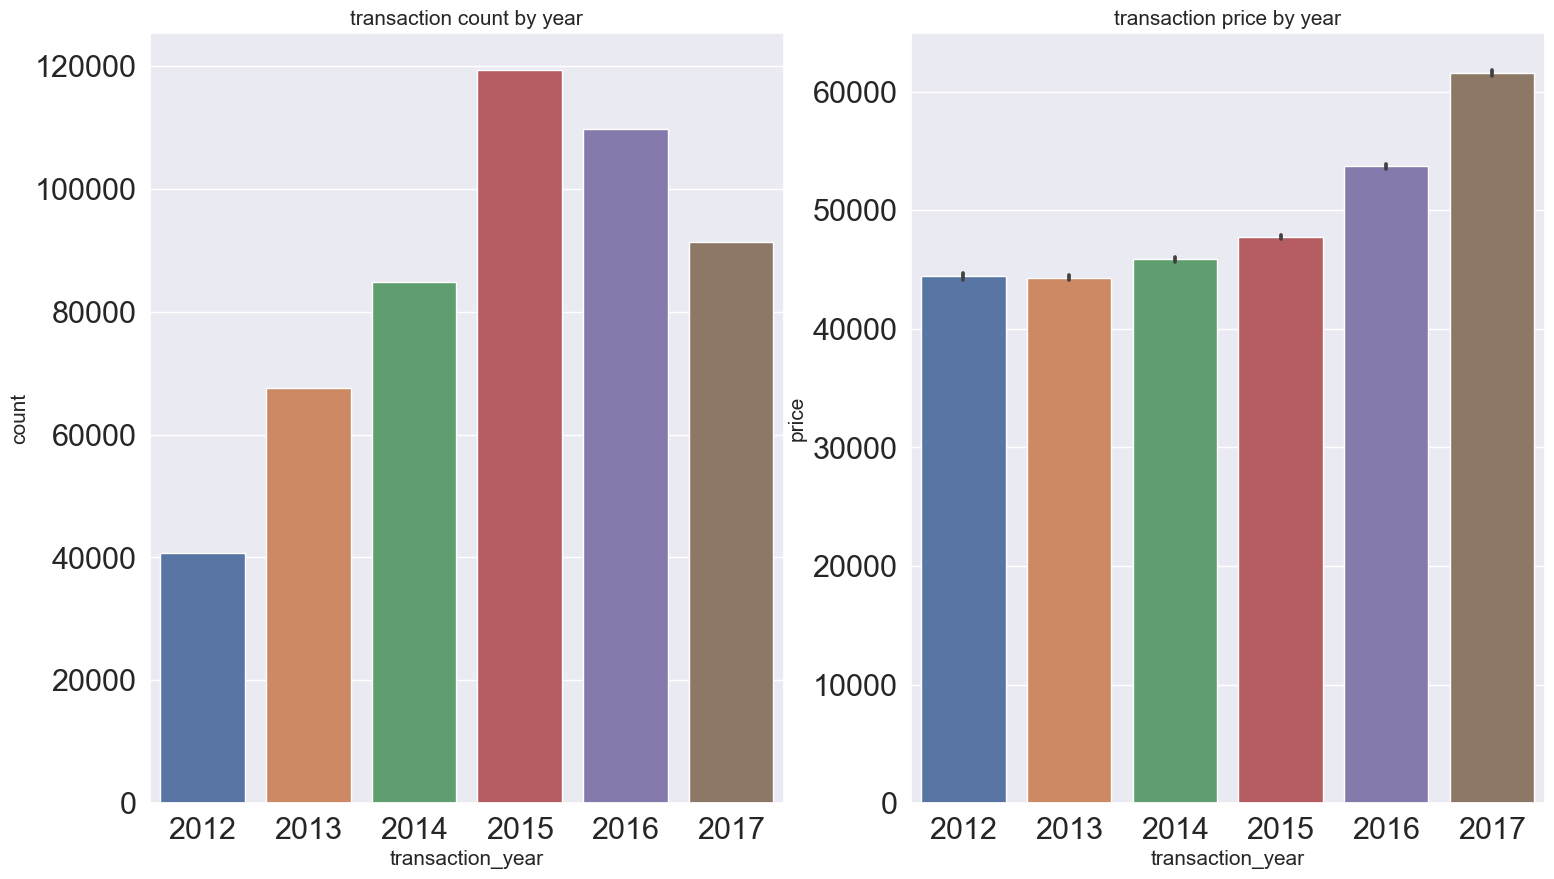

In [15]:
fig,axs=plt.subplots(ncols=2, figsize=(18,10))
sns.set_theme(style="whitegrid")

sns.countplot(ax = axs[0], x = 'transaction_year', data = data)
axs[0].set_title("transaction count by year", fontsize=15)
axs[0].set_xlabel('transaction_year', fontsize=15)
axs[0].set_ylabel('count', fontsize=15)

sns.barplot(ax = axs[1], x = 'transaction_year', y = 'price', data = data)
axs[1].set_title("transaction price by year", fontsize=15)
axs[1].set_xlabel('transaction_year', fontsize=15)
axs[1].set_ylabel('price', fontsize=15)


### 2.3 층 분포 확인/ 층별 가격 분포 확인
    왼쪽에는 층별 거래횟수의 분포를, 오른쪽에는 층별 평균거래가격의 분포를 그려주세요.
    오른쪽 barplot의 error바는 없애서 표현해주세요
    x축은 없애주세요
    '고층일수록 비싸지 않을까?' 라는 가설을 확인하기 위함입니다.
    결과를 해석해주세요
    
    해석: 확실히 저층에 비해 고층의 가격대가 높았습니다. 그러나 너무 고층은 무조건 가격이 높지도 않은 것 같습니다.

[]

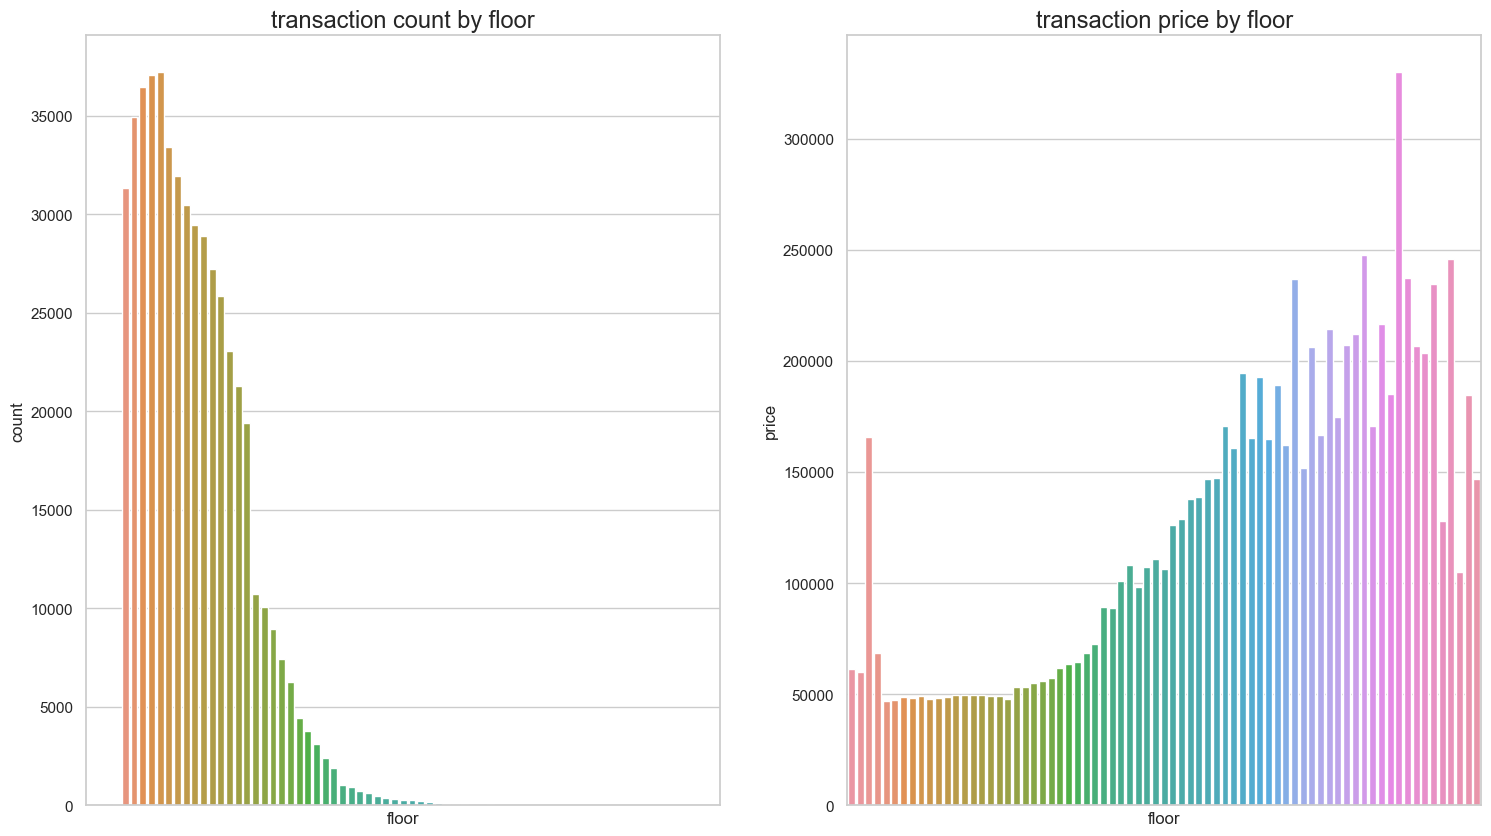

In [16]:
fig,axs=plt.subplots(ncols=2, figsize=(18,10))
sns.set_theme(style="whitegrid")

sns.countplot(ax = axs[0], x = 'floor', data =data)
axs[0].tick_params(left=False)
axs[0].set(xlabel="floor")
axs[0].set_title("transaction count by floor", fontsize=17)

sns.barplot(ax = axs[1], x = 'floor', y = 'price', data = data,ci=None)
axs[1].tick_params(left=False)
axs[1].set(xlabel="floor")
axs[1].set_title("transaction price by floor", fontsize=17)

axs[0].set_xticks([])
axs[1].set_xticks([])

### 2.4 완공연도 분포 확인/ 완공연도별 가격 분포 확인

    완공연도가 최근에 가까워짐에 따라 거래량이 증가하다가 다시 감소하는 경향을 보입니다.주어진 데이터 내에서 완공연도가 초기에 가까운 아파트의 경우 가격이 비교적 높은 경향이 있습니다.

[]

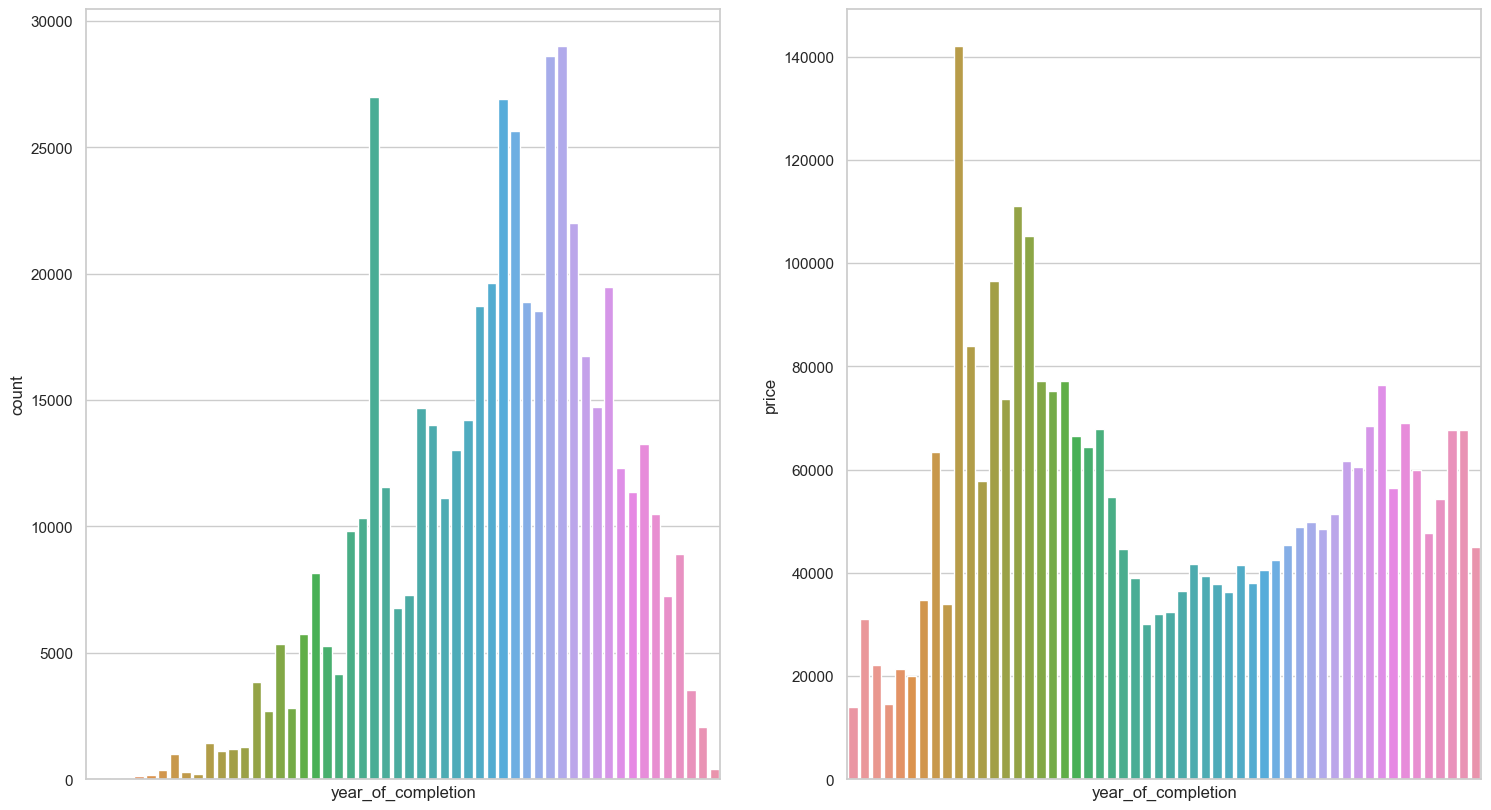

In [17]:
fig,axs=plt.subplots(ncols=2, figsize=(18,10))
sns.set_theme(style="whitegrid")

sns.countplot(ax = axs[0], x = 'year_of_completion', data = data)
axs[0].tick_params(left=False)
axs[0].set(xlabel='year_of_completion')
axs[0].set_xticks([])


sns.barplot(ax = axs[1], x = 'year_of_completion', y = 'price', data = data,ci=None)
axs[1].tick_params(left=False)
axs[1].set(xlabel='year_of_completion')
axs[1].set_xticks([])


### 3.1 아파트 연차 변수 생성
    연차가 높을 수록, 즉 아파트가 오래되었을수록 거래량이 적습니다. 이것은 아무래도 아파트 건물 자체에도 수명이 있다보니 일정 연차를 초과한 아파트의 수가 적어서 그런것이 아닐까? 라는 추측을 해보게되는 그래프입니다. 반면 가격은 어느 정도의 연차 이상일때 높은 가격에 거래되었다 다시 너무 오래된 아파트일 경우 낮은 가격에 거래되었습니다.

In [18]:
data['until_trans'] =  data.transaction_year -data.year_of_completion 

[]

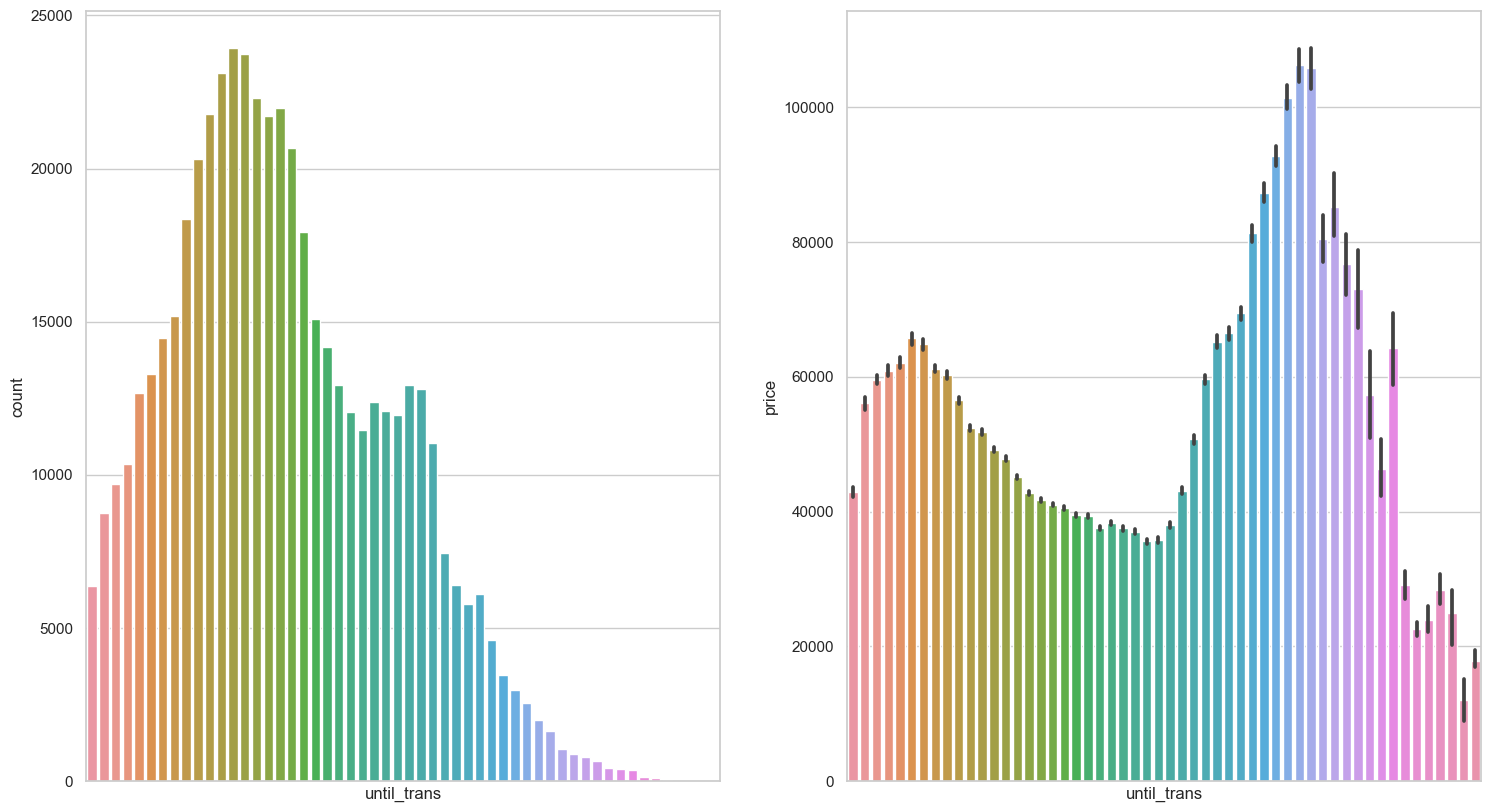

In [19]:
fig,axs=plt.subplots(ncols=2, figsize=(18,10))
sns.set_theme(style="whitegrid")

sns.countplot(ax = axs[0], x = 'until_trans', data = data)
axs[0].tick_params(left=False)
axs[0].set(xlabel='until_trans')
axs[0].set_xticks([])


sns.barplot(ax = axs[1], x = 'until_trans', y = 'price', data =data)
axs[1].tick_params(left=False)
axs[1].set(xlabel='until_trans')
axs[1].set_xticks([])

### 3.2 거래 일 변수 변환

In [20]:
data["transaction_date"]=np.where(data["transaction_date"]=="1~10",0,
                                np.where(data["transaction_date"]=="11~20",1,2))


In [21]:
data.head(1)

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_month,transaction_year,until_trans
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,1,2012,4


### 3.3 월 변수와 10일 단위 변수 통합

In [22]:
data['transaction_month_date']= 3*data['transaction_month']+data['transaction_date']

In [23]:
data[['transaction_month_date','transaction_month','transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


### 3.4 연도별 주기성을 위한 파생변수 생성(삼각변환)

In [24]:
import math

In [25]:
data['sin_date'] = np.sin(2*np.pi*data.transaction_month_date/4)
data['cos_date'] = np.cos(2*np.pi*data.transaction_month_date/4)

In [26]:
data.drop(columns = {'year_of_completion', 'transaction_year_month', 'transaction_date', 'transaction_month', 'transaction_month_date'},
          axis = 1, inplace = True)

### 3.5 삼각변환을 통한 장점

삼각변환을 실시하였을때, 시간이나 날짜와 같은 자료의 주기적인 특성을 반영할 수 있다는 장점이 있습니다.

## 4. 텍스트 데이터 다루기

#### 4.1아파트 이름 한글부분만 뽑기

In [27]:
import re

In [28]:
apt=data['apt'].astype(str)


In [29]:
apt=apt.str.replace('[\d(\-\(\))]','')
apt.head(5)

0    광화문풍림스페이스본
1    광화문풍림스페이스본
2    광화문풍림스페이스본
3      로얄팰리스스위트
4      로얄팰리스스위트
Name: apt, dtype: object

#### 4.2 아파트 이름 DTM

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vect = CountVectorizer()
apt_dtm=count_vect.fit_transform(apt)

In [32]:
count_vect.vocabulary_

{'광화문풍림스페이스본': 439,
 '로얄팰리스스위트': 1441,
 '현대뜨레비앙': 5030,
 '운현신화타워': 3635,
 '창신쌍용': 4219,
 '동대문': 1104,
 '두산': 1265,
 '종로청계힐스테이트': 4070,
 '동일상가': 1225,
 '렉스팰리스': 1421,
 '삼성': 2200,
 '프라임캐슬케이빌라트': 4700,
 '대아파크빌': 923,
 '세종로대우': 2730,
 '파크팰리스': 4602,
 '킹스매너': 4462,
 '경희궁의아침단지': 316,
 '동성아파트동': 1159,
 '아남': 3150,
 '동아': 1172,
 '롯데캐슬': 1466,
 '로잔': 1447,
 '크래스빌': 4452,
 '롯데낙천대': 1460,
 '인왕산아이파크': 3869,
 '현대': 5014,
 '미도파': 1762,
 '효성쥬얼리시티': 5237,
 '종로센트레빌': 4066,
 '대성맨션': 901,
 '청운현대': 4362,
 'cs타워': 14,
 '렉스빌': 1420,
 '창신이수': 4220,
 '브라운스톤창신': 2108,
 '오성': 3481,
 '벽산블루밍평창힐스': 1993,
 '갑을': 134,
 '형우럭스빌': 5134,
 'mid그린동': 59,
 '유성': 3727,
 '르트랑시망': 1501,
 '무악다온채': 1720,
 '세종': 2727,
 '대성스카이렉스': 903,
 '하림빌라트': 4741,
 '도시그린빌라트': 1061,
 '신동아블루아광화문의': 2940,
 '리치캐슬아파트': 1547,
 '롯데캐슬천지인': 1482,
 '별빛고운': 2000,
 '그린': 504,
 '부암스카이뷰': 2062,
 '동대문맨션': 1105,
 '건양하늘터': 259,
 '일성빌라트': 3887,
 '흥인': 5287,
 '도시그린빌라트차': 1062,
 '아마레스': 3163,
 '숭인동': 2836,
 '낙원': 636,
 '노블레스빌': 692,
 '혜화훼미리': 5151,
 '대보': 892,


### 4.3 아파트 이름 tf-idf

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vec_tfidf = TfidfVectorizer()
apt_tfidf = vec_tfidf.fit_transform(apt)

In [35]:
vec_tfidf.vocabulary_

{'광화문풍림스페이스본': 439,
 '로얄팰리스스위트': 1441,
 '현대뜨레비앙': 5030,
 '운현신화타워': 3635,
 '창신쌍용': 4219,
 '동대문': 1104,
 '두산': 1265,
 '종로청계힐스테이트': 4070,
 '동일상가': 1225,
 '렉스팰리스': 1421,
 '삼성': 2200,
 '프라임캐슬케이빌라트': 4700,
 '대아파크빌': 923,
 '세종로대우': 2730,
 '파크팰리스': 4602,
 '킹스매너': 4462,
 '경희궁의아침단지': 316,
 '동성아파트동': 1159,
 '아남': 3150,
 '동아': 1172,
 '롯데캐슬': 1466,
 '로잔': 1447,
 '크래스빌': 4452,
 '롯데낙천대': 1460,
 '인왕산아이파크': 3869,
 '현대': 5014,
 '미도파': 1762,
 '효성쥬얼리시티': 5237,
 '종로센트레빌': 4066,
 '대성맨션': 901,
 '청운현대': 4362,
 'cs타워': 14,
 '렉스빌': 1420,
 '창신이수': 4220,
 '브라운스톤창신': 2108,
 '오성': 3481,
 '벽산블루밍평창힐스': 1993,
 '갑을': 134,
 '형우럭스빌': 5134,
 'mid그린동': 59,
 '유성': 3727,
 '르트랑시망': 1501,
 '무악다온채': 1720,
 '세종': 2727,
 '대성스카이렉스': 903,
 '하림빌라트': 4741,
 '도시그린빌라트': 1061,
 '신동아블루아광화문의': 2940,
 '리치캐슬아파트': 1547,
 '롯데캐슬천지인': 1482,
 '별빛고운': 2000,
 '그린': 504,
 '부암스카이뷰': 2062,
 '동대문맨션': 1105,
 '건양하늘터': 259,
 '일성빌라트': 3887,
 '흥인': 5287,
 '도시그린빌라트차': 1062,
 '아마레스': 3163,
 '숭인동': 2836,
 '낙원': 636,
 '노블레스빌': 692,
 '혜화훼미리': 5151,
 '대보': 892,


### 4.4 질문
해당 방식으로 만든 행렬을 원래 데이터프레임에 붙여서 분석/모델링을 진행한다고 생각해봅시다.

    어떤 문제점이 발생할 수 있을까요?
    해당 어떤 방식으로 개선할 수 있을까요?

### 5. 인코딩

In [36]:
data = data.drop(columns = ['addr_kr'])

#### 5.1 원핫 인코딩

In [37]:
dong_onehot = pd.get_dummies(data['dong'], drop_first = True)
dong_onehot

,가리봉동,가산동,가양동,갈월동,갈현동,강일동,개봉동,개포동,거여동,견지동,...,황학동,회기동,회현동1가,회현동2가,효제동,효창동,후암동,휘경동,흑석동,흥인동
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513524,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513525,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513526,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
apt_onehot = pd.get_dummies(data['apt'], drop_first = True)
apt_onehot

,(1-102),(1-35),(1101-1),(115-4),(115-5),(124-12),(13-21),(145-0),(1544-0),(1546-0),...,힐탑,힐탑아파트3차(894-3),힐탑아파트4차(894-5),힐탑이루미,힐탑트레져1동,힐튼,힐튼빌리지1차,힐튼빌리지2차,힐하우스,힐하우스(802-3)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 적절한가요?

관찰값에 비해 열의 개수가 너무 많아 적절하지 않습니다. 이러한 경우 데이터에 0이 과도하게 많아 변수들이 많은 정보를 포함하지 않고 있어 성능이 저하되는 차원의 저주 문제가 발생하기 때문입니다.

#### 5.2 레이블(label) 인코딩 - transaction_year

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder = LabelEncoder()

In [41]:
data['transaction_year'] = encoder.fit_transform(data.transaction_year.values)

In [42]:
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,4,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,4,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,4,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,30500,0,7,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,30500,0,7,1.000000e+00,3.061617e-16


#### 5.3레이블 인코딩

In [43]:
apt_label = encoder.fit_transform(data.apt.values)
data['apt'] = apt_label
dong_label = encoder.fit_transform(data.dong.values)
data['dong'] = dong_label
data.head(10)

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,805,95.88,6,70000,0,4,-1.000000e+00,-1.836970e-16
1,130,805,108.55,11,100500,0,4,-2.449294e-16,1.000000e+00
2,130,805,94.51,1,65800,0,4,-2.449294e-16,1.000000e+00
3,164,2042,42.87,8,30500,0,7,-1.000000e+00,-1.836970e-16
4,164,2042,39.67,15,30500,0,7,1.000000e+00,3.061617e-16
5,164,2042,39.67,16,25000,0,7,1.000000e+00,3.061617e-16
6,164,2042,39.67,14,31500,0,7,1.000000e+00,3.061617e-16
7,247,6448,45.50,9,25000,0,9,-1.000000e+00,-1.836970e-16
8,247,6448,36.08,6,19000,0,9,-1.000000e+00,-1.836970e-16
9,247,6448,46.64,5,22800,0,9,-2.449294e-16,1.000000e+00


#### mean encoding

In [44]:
apt_mean = data.groupby('apt')['price'].mean()
data['apt'] = data['apt'].map(apt_mean)
data.head(10)

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,91174.766355,95.88,6,70000,0,4,-1.000000e+00,-1.836970e-16
1,130,91174.766355,108.55,11,100500,0,4,-2.449294e-16,1.000000e+00
2,130,91174.766355,94.51,1,65800,0,4,-2.449294e-16,1.000000e+00
3,164,36609.649123,42.87,8,30500,0,7,-1.000000e+00,-1.836970e-16
4,164,36609.649123,39.67,15,30500,0,7,1.000000e+00,3.061617e-16
5,164,36609.649123,39.67,16,25000,0,7,1.000000e+00,3.061617e-16
6,164,36609.649123,39.67,14,31500,0,7,1.000000e+00,3.061617e-16
7,247,24163.186813,45.50,9,25000,0,9,-1.000000e+00,-1.836970e-16
8,247,24163.186813,36.08,6,19000,0,9,-1.000000e+00,-1.836970e-16
9,247,24163.186813,46.64,5,22800,0,9,-2.449294e-16,1.000000e+00
